In [1]:
import os
from dotenv import find_dotenv, load_dotenv

load_dotenv(find_dotenv())
src_path = os.environ.get('PROJECT_SRC')
os.chdir(src_path)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

import heat_demand as hd
import elec_demand as ed
import cop

In [3]:
weather_year = 2020
future_year = 2035
FES_year = '2022'
FES_scenario = 'LW'

In [4]:
# list of LA
LAs = pd.read_csv('data/LA_UK/air_temp/air_temp_2012.csv', index_col=0).columns

In [5]:
df_ASHP = cop.day_cop_for_year_LA('ASHP', 'very good', future_year=future_year, weather_year=weather_year)
df_GSHP = cop.day_cop_for_year_LA('GSHP', 'very good', future_year=future_year, weather_year=weather_year)

In [6]:
hd_las ={}
air_temp_daily = pd.read_csv('data/LA_UK/air_temp/average_day_air_temp_' + str(weather_year) + '.csv')
normalised_profiles = {'daytime': pd.read_excel('data/normalised_half_hourly_profiles.xlsx', sheet_name='Total heat daytime HPs', usecols="B:I"),
                        'bi-modal': pd.read_excel('data/normalised_half_hourly_profiles.xlsx', sheet_name='Total heat bimodal HPs', usecols="B:I"),
                        'continuous': pd.read_excel('data/normalised_half_hourly_profiles.xlsx', sheet_name='Total heat continuous HPs', usecols="B:I")}
LA_heat_pattern_total = hd.LA_heat_pattern_totals(future_year, FES_year, FES_scenario)
FES_scaling = hd.FES_scaling_factor_calc(future_year, FES_year, FES_scenario)

In [7]:
FES_scaling

1.0

In [8]:
for LA in LAs:
    hd.heat_demand_for_LA_half_hourly(LA, air_temp_daily, weather_year, future_year, FES_year, FES_scenario, FES_scaling, normalised_profiles, LA_heat_pattern_total)
    filename = 'data/heat_demand_profiles/' + LA + '_' + FES_scenario + '_' + FES_year + '_' + str(weather_year) + '_' + str(future_year) + '.csv'
    hd_df = pd.read_csv(filename, index_col=0)
    hd_df.index = pd.to_datetime(hd_df.index)
    hd_las[LA] = hd_df
hd_las

{'Aberdeen City':                             ASHP        GSHP     Gas boiler  BioLPG boiler  \
 2020-01-01 00:00:00   944.203087  333.098189   41173.658224            0.0   
 2020-01-01 00:30:00   953.626863  337.847808   40397.413015            0.0   
 2020-01-01 01:00:00   980.960149  347.800189   41234.873020            0.0   
 2020-01-01 01:30:00  1004.776249  356.138574   42123.082267            0.0   
 2020-01-01 02:00:00  1060.065096  373.957022   45719.045826            0.0   
 ...                          ...         ...            ...            ...   
 2020-12-31 21:30:00  2247.925160  705.173056  173791.211380            0.0   
 2020-12-31 22:00:00  1990.007768  642.607227  137199.564104            0.0   
 2020-12-31 22:30:00  1736.507197  580.430926  102001.105242            0.0   
 2020-12-31 23:00:00  1551.848588  534.921421   76957.293415            0.0   
 2020-12-31 23:30:00  1462.289033  513.460789   64541.589795            0.0   
 
                      Biomass boi

In [9]:
reformed_dict = {}
for outerKey, innerDict in hd_las.items():
    for innerKey, values in innerDict.items():
        reformed_dict[(outerKey,
                    innerKey)] = values
df_hd_las = pd.DataFrame.from_dict(reformed_dict)
df_hd_las

Aberdeen City                                           \
                             ASHP        GSHP     Gas boiler BioLPG boiler   
2020-01-01 00:00:00    944.203087  333.098189   41173.658224           0.0   
2020-01-01 00:30:00    953.626863  337.847808   40397.413015           0.0   
2020-01-01 01:00:00    980.960149  347.800189   41234.873020           0.0   
2020-01-01 01:30:00   1004.776249  356.138574   42123.082267           0.0   
2020-01-01 02:00:00   1060.065096  373.957022   45719.045826           0.0   
...                           ...         ...            ...           ...   
2020-12-31 21:30:00   2247.925160  705.173056  173791.211380           0.0   
2020-12-31 22:00:00   1990.007768  642.607227  137199.564104           0.0   
2020-12-31 22:30:00   1736.507197  580.430926  102001.105242           0.0   
2020-12-31 23:00:00   1551.848588  534.921421   76957.293415           0.0   
2020-12-31 23:30:00   1462.289033  513.460789   64541.589795           0.0   

                                                              \
                    Biomass boiler    Community           DH   
2020-01-01 00:00:00            0.0   364.628488   910.530774   
2020-01-01 00:30:00            0.0   357.754163   893.364576   
2020-01-01 01:00:00            0.0   365.170599   911.884502   
2020-01-01 01:30:00            0.0   373.036463   931.526718   
2020-01-01 02:00:00            0.0   404.881842  1011.049296   
...                            ...          ...          ...   
2020-12-31 21:30:00            0.0  1539.072053  3843.288476   
2020-12-31 22:00:00            0.0  1215.021250  3034.086128   
2020-12-31 22:30:00            0.0   903.308339  2255.693307   
2020-12-31 23:00:00            0.0   681.523644  1701.864419   
2020-12-31 23:30:00            0.0   571.571809  1427.298575   

                                                         \
                    Electric resistive Electric storage   
2020-01-01 00:00:00                0.0     13515.461319   
2020-01-01 00:30:00                0.0     13787.779580   
2020-01-01 01:00:00                0.0     14206.066706   
2020-01-01 01:30:00                0.0     14534.889043   
2020-01-01 02:00:00                0.0     15157.218669   
...                                ...              ...   
2020-12-31 21:30:00                0.0     23780.521623   
2020-12-31 22:00:00                0.0     22780.698232   
2020-12-31 22:30:00                0.0     21738.058331   
2020-12-31 23:00:00                0.0     20969.675539   
2020-12-31 23:30:00                0.0     20663.016745   

                                                   ...      Brentwood  \
                    Hybrid (ASHP + BioLPG boiler)  ... Biomass boiler   
2020-01-01 00:00:00                           0.0  ...            0.0   
2020-01-01 00:30:00                           0.0  ...            0.0   
2020-01-01 01:00:00                           0.0  ...            0.0   
2020-01-01 01:30:00                           0.0  ...            0.0   
2020-01-01 02:00:00                           0.0  ...            0.0   
...                                           ...  ...            ...   
2020-12-31 21:30:00                           0.0  ...            0.0   
2020-12-31 22:00:00                           0.0  ...            0.0   
2020-12-31 22:30:00                           0.0  ...            0.0   
2020-12-31 23:00:00                           0.0  ...            0.0   
2020-12-31 23:30:00                           0.0  ...            0.0   

                                                                \
                      Community          DH Electric resistive   
2020-01-01 00:00:00   69.252497  172.933635         325.871337   
2020-01-01 00:30:00   67.944321  169.666926         319.715643   
2020-01-01 01:00:00   69.351510  173.180884         326.337246   
2020-01-01 01:30:00   70.843810  176.907376         333.359345   
2020-01-01 02:00:00   76.893222  192.013645         361.82

<AxesSubplot: >

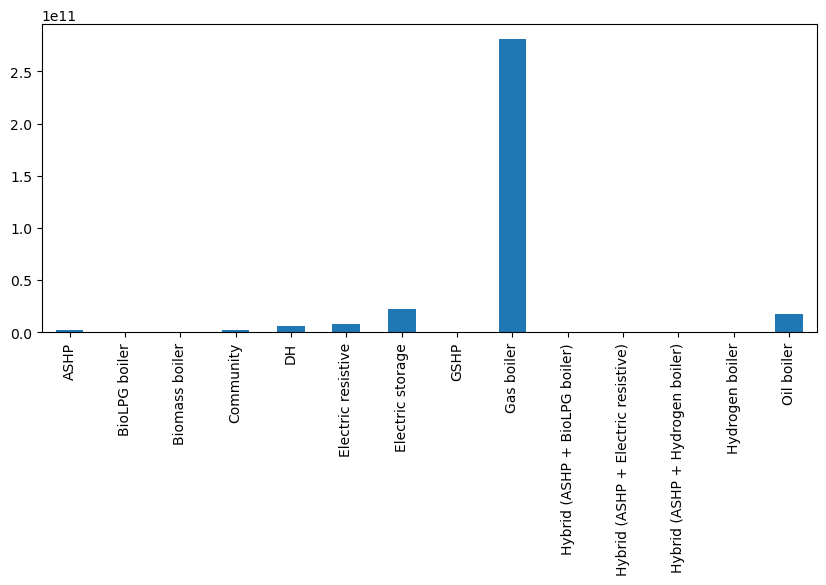

In [10]:
df_hd_las.groupby(level=1, axis=1).sum().sum().plot.bar(figsize=(10,4))

In [11]:
df_hd_las.groupby(level=1, axis=1).sum().sum().sum() / 1000000000

341.12595810420737

In [12]:
# calculates the electric demand given the heat demand and the COPs
ed_LAs = ed.electric_demand_for_heat(hd_las, LAs, df_ASHP, df_GSHP)

In [13]:
reformed_dict = {}
for outerKey, innerDict in ed_LAs.items():
    for innerKey, values in innerDict.items():
        reformed_dict[(outerKey,
                    innerKey)] = values
df = pd.DataFrame.from_dict(reformed_dict) / 1000000000
# compare this to 47.856 TWh for Leading the Way 2050 from FES22 building blocks DEM_BB004
round(df.sum().sum(), 1)

0.9

<AxesSubplot: >

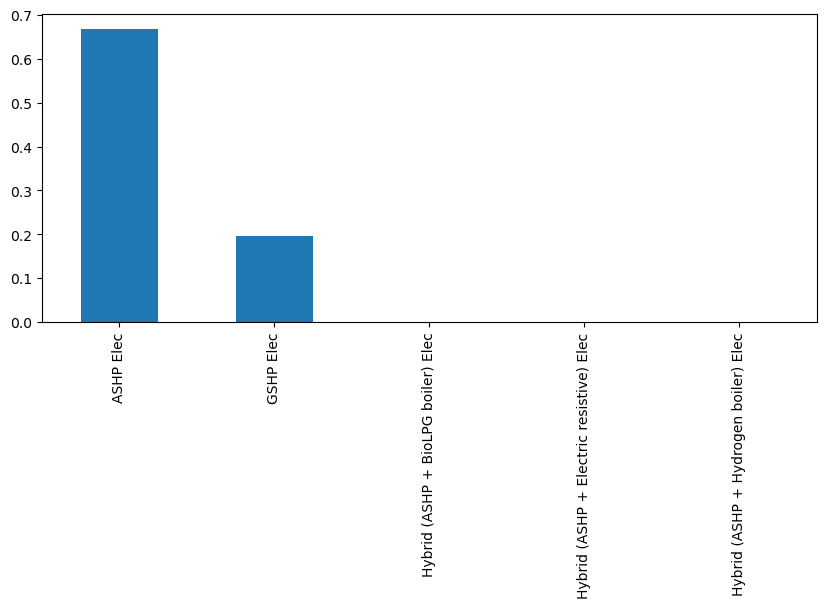

In [14]:
df.groupby(level=1, axis=1).sum().sum().plot.bar(figsize=(10,4))

In [24]:
df_4 = df.groupby(level=0, axis=1).sum()
df_4[df_4 < 0] = 0
df_4

,Aberdeen City,Aberdeenshire,Adur,Allerdale,Amber Valley,Angus,Argyll and Bute,Arun,Ashfield,Ashford,...,Wokingham,Wolverhampton,Worcester,Worthing,Wrexham,Wychavon,Wycombe,Wyre,Wyre Forest,York
2020-01-01 00:00:00,3.838598e-07,4.082853e-07,4.931533e-08,5.478593e-08,7.691255e-08,2.050915e-07,1.962880e-07,1.922527e-07,4.992321e-08,6.385769e-08,...,8.872160e-08,1.824255e-07,7.224155e-08,1.389181e-07,1.130870e-07,9.099156e-08,1.424481e-07,8.468655e-08,7.127410e-08,1.929824e-07
2020-01-01 00:30:00,3.880993e-07,4.127865e-07,5.026386e-08,5.583968e-08,7.776151e-08,2.073505e-07,1.984500e-07,1.954143e-07,5.088226e-08,6.508665e-08,...,8.970145e-08,1.844456e-07,7.304121e-08,1.404550e-07,1.143319e-07,9.199837e-08,1.440224e-07,8.562163e-08,7.206103e-08,1.961560e-07
2020-01-01 01:00:00,3.993002e-07,4.246980e-07,5.241602e-08,5.823059e-08,8.000565e-08,2.133333e-07,2.041760e-07,2.017490e-07,5.306044e-08,6.787380e-08,...,9.229031e-08,1.897702e-07,7.514969e-08,1.445093e-07,1.176307e-07,9.465400e-08,1.481793e-07,8.809270e-08,7.414072e-08,2.025147e-07
2020-01-01 01:30:00,4.089643e-07,4.349764e-07,5.409511e-08,6.009593e-08,8.194197e-08,2.184963e-07,2.091174e-07,2.067992e-07,5.475997e-08,7.004817e-08,...,9.452397e-08,1.943634e-07,7.696860e-08,1.480070e-07,1.204774e-07,9.694496e-08,1.517656e-07,9.022475e-08,7.593510e-08,2.075841e-07
2020-01-01 02:00:00,4.309583e-07,4.583785e-07,5.804601e-08,6.448511e-08,8.634937e-08,2.302539e-07,2.203703e-07,2.164163e-07,5.876031e-08,7.516367e-08,...,9.960750e-08,2.048104e-07,8.110597e-08,1.559638e-07,1.269613e-07,1.021566e-07,1.599264e-07,9.507730e-08,8.001917e-08,2.172376e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 21:30:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2020-12-31 22:00:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2020-12-31 22:30:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2020-12-31 23:00:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


<AxesSubplot: >

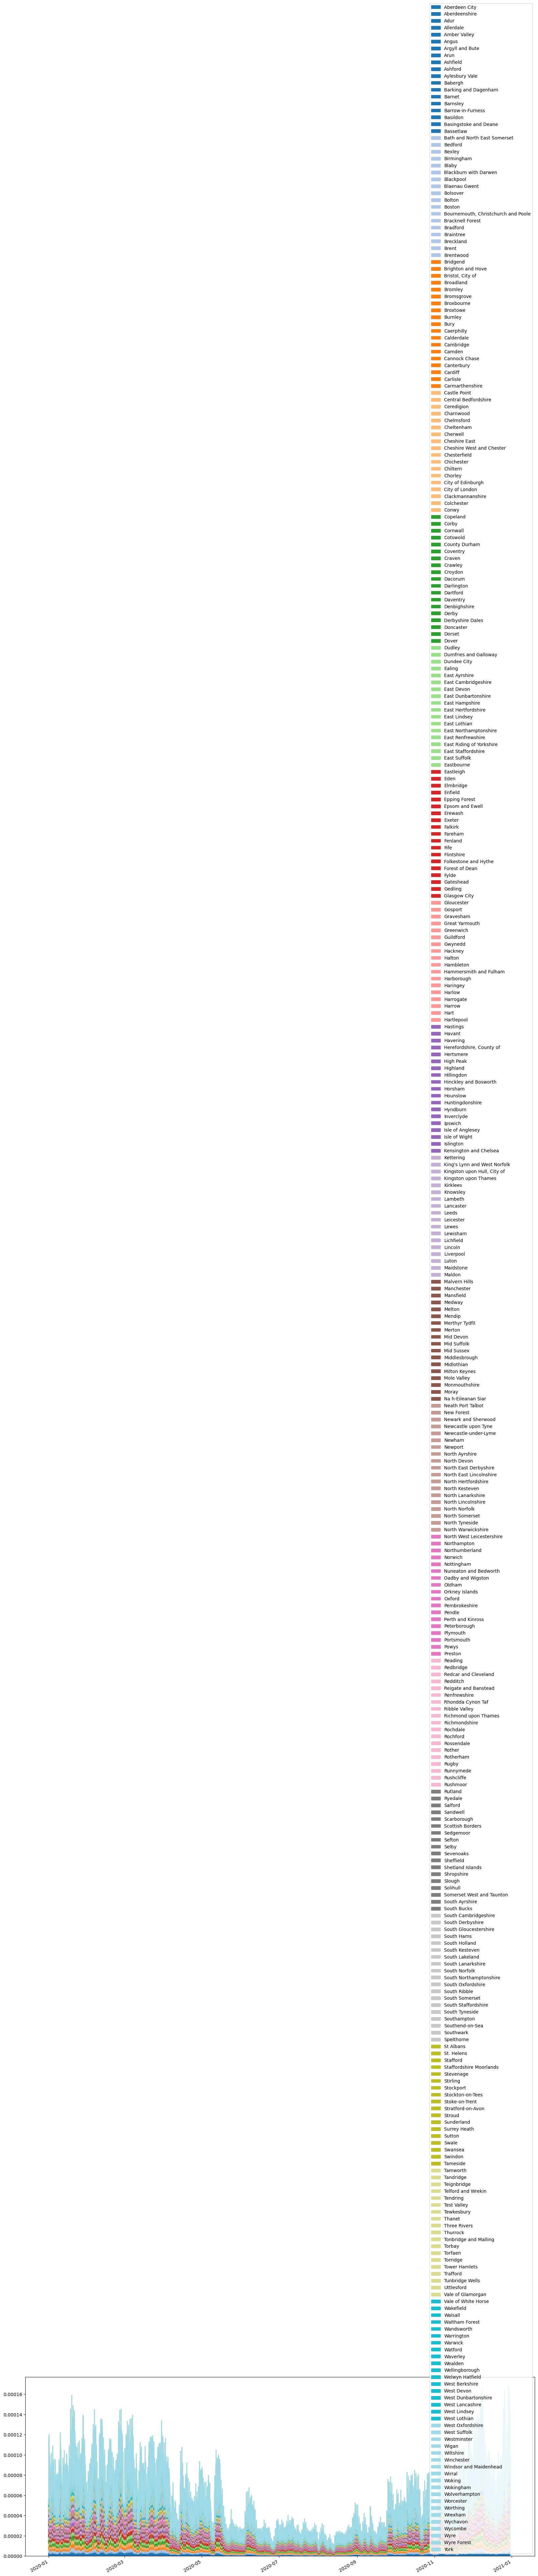

In [25]:
df_4.plot.area(figsize=(20,8), cmap='tab20')

In [26]:
df_kwh = df * 1000000000
df_kwh.to_csv('outputs/elec_for_heat_demand_profiles/' + FES_scenario + '_' + FES_year + '_' + str(weather_year) + '_' + str(future_year) + '.csv')